In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
# pm1 y pm2 en minutos (puede tener decimales)
pm1 = 30240
pm2 = 43200

In [39]:
the_path = os.getcwd()
data_path = os.path.join(the_path, '../data/processed-data/')
file_name = 'processed.csv'
file_path = data_path + file_name
df = pd.read_csv(file_path, index_col='Date')

In [40]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,Average
Date,
2011-09-13 13:53:00,5.9
2011-09-13 13:54:00,5.9
2011-09-13 13:55:00,5.9
2011-09-13 13:56:00,5.9
2011-09-13 13:57:00,5.9


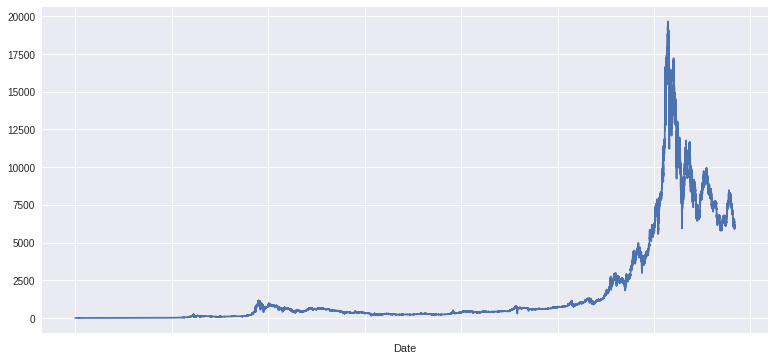

In [41]:
df['Average'].plot(figsize=(13,6))

In [42]:
# getting just last 6 months
df.index = pd.to_datetime(df.index)
df_M = df.last('9M').copy()
df_M.head(5)

,Average
Date,
2017-11-30 00:01:00,9813.3825
2017-11-30 00:02:00,9786.9700
2017-11-30 00:03:00,9766.7500
2017-11-30 00:04:00,9731.4250
2017-11-30 00:05:00,9750.1825


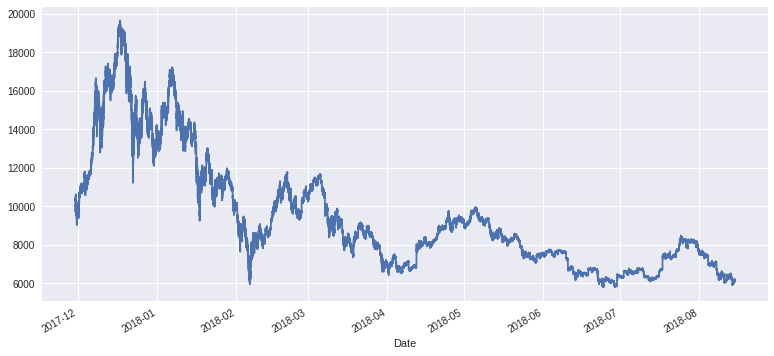

In [43]:
df_M['Average'].plot(figsize=(13,6))

In [45]:
df_M['PM1'] = df_M['Average'].rolling(pm1).mean()
df_M['PM2'] = df_M['Average'].rolling(pm2).mean()
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2
Date,,,
2017-12-29 23:31:00,14568.3800,15969.087960,14781.073408
2017-12-29 23:32:00,14558.6800,15969.043318,14781.183253
2017-12-29 23:33:00,14546.1800,15968.998335,14781.293420
2017-12-29 23:34:00,14533.5825,15968.953189,14781.403763
2017-12-29 23:35:00,14524.9550,15968.908002,14781.514725


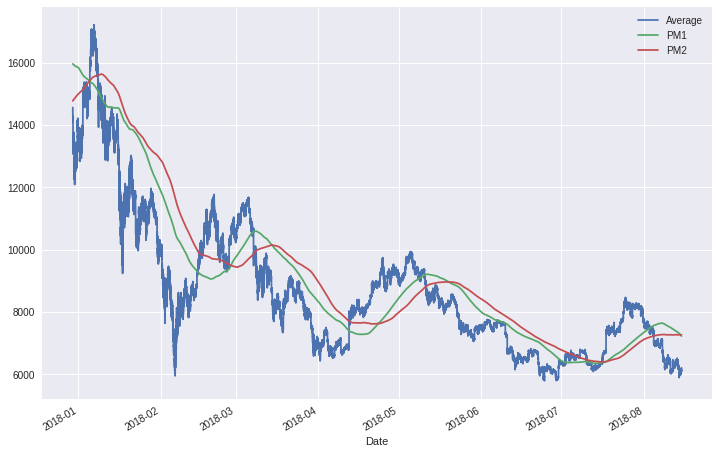

In [46]:
df_M.plot(figsize=(12,8))

In [47]:
df_M['Posicion'] = np.where(df_M['PM1'] > df_M['PM2'], 1, -1)

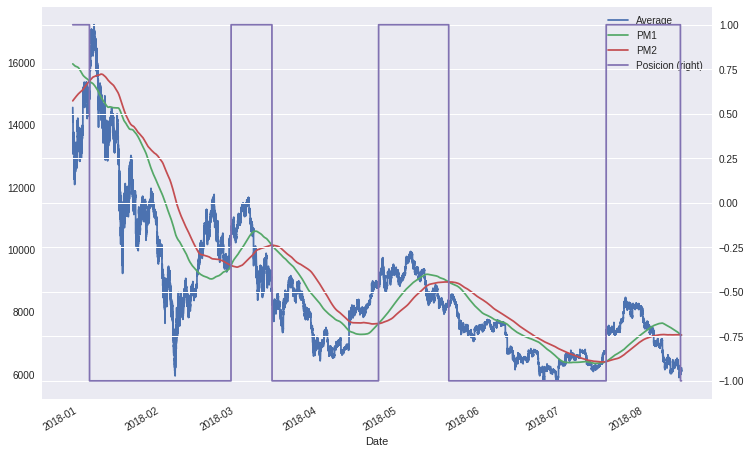

In [49]:
df_M.plot(figsize=(12,8), secondary_y = 'Posicion')

In [50]:
df_M['Retornos'] = np.log(df_M['Average']/df_M['Average'].shift(1))

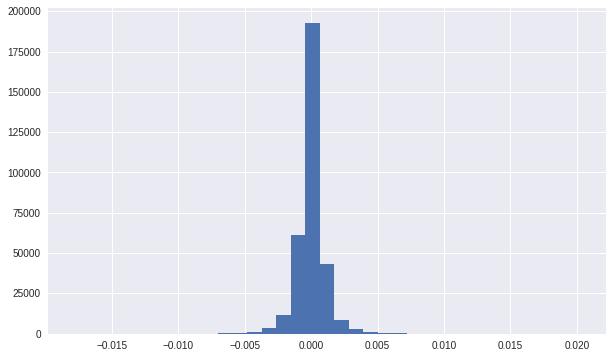

In [51]:
df_M['Retornos'].hist(bins=35, figsize=(10,6));

In [52]:
df_M.dropna(inplace = True)
df_M['Estrategia'] = df_M['Retornos']* df_M['Posicion'].shift(1)
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2,Posicion,Retornos,Estrategia
Date,,,,,,
2017-12-29 23:33:00,14546.1800,15968.998335,14781.293420,1,-0.000859,-0.000859
2017-12-29 23:34:00,14533.5825,15968.953189,14781.403763,1,-0.000866,-0.000866
2017-12-29 23:35:00,14524.9550,15968.908002,14781.514725,1,-0.000594,-0.000594
2017-12-29 23:36:00,14501.9925,15968.862654,14781.624720,1,-0.001582,-0.001582
2017-12-29 23:37:00,14475.9925,15968.816631,14781.733922,1,-0.001794,-0.001794


In [53]:
df_M['Retacum'] = df_M['Retornos'].cumsum().apply(np.exp)
df_M['Estracum'] = df_M['Estrategia'].cumsum().apply(np.exp)
df_M.tail()

,Average,PM1,PM2,Posicion,Retornos,Estrategia,Retacum,Estracum
Date,,,,,,,,
2018-08-14 23:56:00,6203.3325,7228.194197,7266.035387,-1,0.000662,-0.000662,0.426092,1.027576
2018-08-14 23:57:00,6191.4100,7228.119447,7266.031394,-1,-0.001924,0.001924,0.425273,1.029555
2018-08-14 23:58:00,6193.6350,7228.044870,7266.027478,-1,0.000359,-0.000359,0.425426,1.029185
2018-08-14 23:59:00,6193.6350,7227.970172,7266.023485,-1,0.000000,-0.000000,0.425426,1.029185
2018-08-15 00:00:00,6196.1000,7227.895401,7266.019487,-1,0.000398,-0.000398,0.425595,1.028776


([], <a list of 0 Text xticklabel objects>)

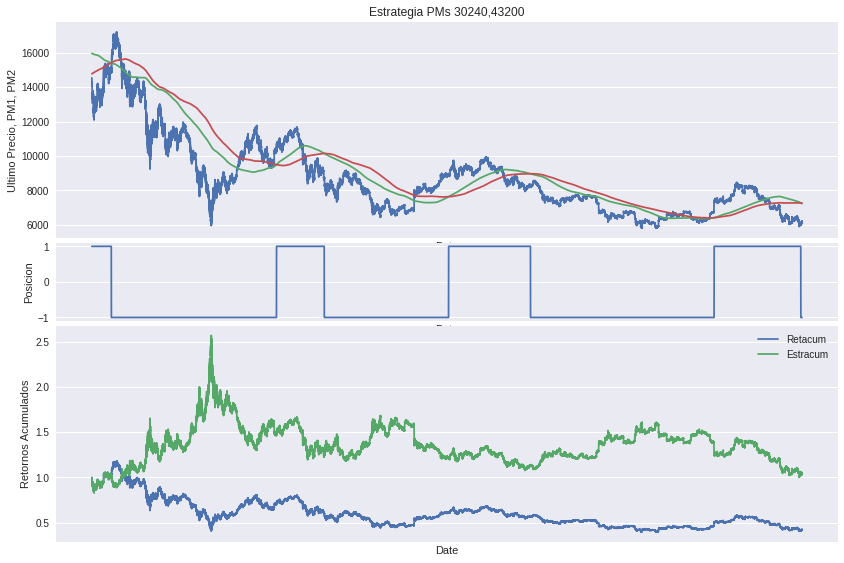

In [54]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((25,1),(0,0),rowspan = 8, colspan = 1)
df_M['Average'].plot(title = ('Estrategia PMs ' + str(pm1) + ',' + str(pm2)))
df_M['PM1'].plot(ax=ax1)
df_M['PM2'].plot(ax=ax1)

ax1.set_ylabel('Ultimo Precio, PM1, PM2')
plt.xticks([],[])

ax2 = plt.subplot2grid((25,1),(8,0), rowspan = 3, colspan = 1)
df_M['Posicion'].plot(ylim=[-1.1,1.1])
ax2.set_ylabel('Posicion')
plt.xticks([],[])

ax3=plt.subplot2grid((25,1),(11,0),rowspan = 8, colspan = 1)
df_M[['Retacum', 'Estracum']].plot(ax = ax3)
ax3.set_ylabel('Retornos Acumulados')
plt.xticks([],[])